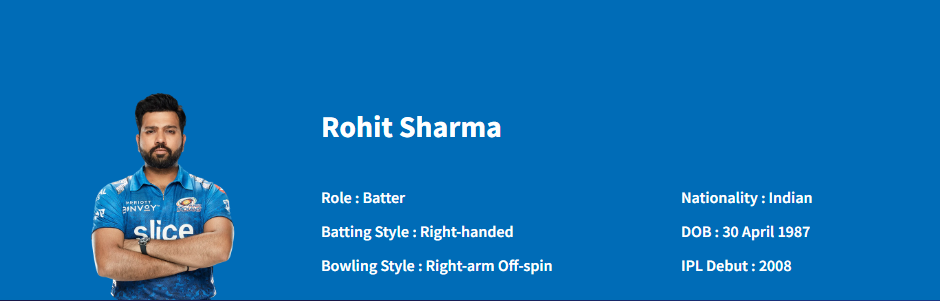

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm

sns.set()
%matplotlib inline
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

from IPython.display import Image

Image("rohitsharmaipl.PNG")

# 1. Dataset Exploration and Preprocessing

In [3]:
full_df = pd.read_csv('all_matches.csv')

print(full_df.shape)
display(full_df.info())
display(full_df.head())

(225954, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                225954 non-null  int64  
 1   season                  225954 non-null  object 
 2   start_date              225954 non-null  object 
 3   venue                   225954 non-null  object 
 4   innings                 225954 non-null  int64  
 5   ball                    225954 non-null  float64
 6   batting_team            225954 non-null  object 
 7   bowling_team            225954 non-null  object 
 8   striker                 225954 non-null  object 
 9   non_striker             225954 non-null  object 
 10  bowler                  225954 non-null  object 
 11  runs_off_bat            225954 non-null  int64  
 12  extras                  225954 non-null  int64  
 13  wides                   7026 non-null    float64
 14  noballs

None

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Remove Super Over Innings
print(full_df['innings'].unique())

full_df = full_df[(full_df['innings'] == 1) | (full_df['innings'] == 2)]

print(full_df['innings'].unique())

[1 2 3 4 5 6]
[1 2]


In [5]:
full_df['season'] = full_df['season'].astype(str)

In [6]:
full_df['wicket_type'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [7]:
print(full_df['season'].unique())

full_df.loc[full_df['season'] == '2007/08', 'season'] = '2008'
full_df.loc[full_df['season'] == '2009/10', 'season'] = '2010'
full_df.loc[full_df['season'] == '2020/21', 'season'] = '2020'

print(full_df['season'].unique())

['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2019' '2018' '2020/21' '2021' '2022']
['2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017'
 '2019' '2018' '2020' '2021' '2022']


In [8]:
# Get Mumbai Indians batsman names to find out Rohit Sharma formatted name
full_df[full_df['batting_team'] == 'Mumbai Indians']['striker'].unique()

array(['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa',
       'PR Shah', 'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'DJ Bravo',
       'MA Khote', 'A Nehra', 'SS Tiwary', 'DS Kulkarni', 'AM Rahane',
       'MK Pandey', 'YV Takawale', 'RR Raje', 'SR Tendulkar', 'DR Smith',
       'SD Chitnis', 'CRD Fernando', 'VS Yeligati', 'S Dhawan',
       'JP Duminy', 'Z Khan', 'GR Napier', 'C Nanda', 'SL Malinga',
       'Mohammad Ashraful', 'AP Tare', 'AT Rayudu', 'R Sathish',
       'R McLaren', 'KA Pollard', 'AN Ahmed', 'C Madan', 'STR Binny',
       'DJ Jacobs', 'RG Sharma', 'JEC Franklin', 'A Symonds',
       'AG Murtaza', 'AC Blizzard', 'TL Suman', 'MM Patel', 'RE Levi',
       'KD Karthik', 'SA Yadav', 'PP Ojha', 'CJ McKay', 'RP Singh',
       'NLTC Perera', 'RJ Peterson', 'HH Gibbs', 'RT Ponting', 'R Dhawan',
       'MG Johnson', 'GJ Maxwell', 'NM Coulter-Nile', 'MEK Hussey',
       'CJ Anderson', 'CM Gautam', 'JJ Bumrah', 'BR Dunk', 'LMP Simmons',
       'S Gopal', 'M de Lange'

In [9]:
Rohit = 'RG Sharma'

# 2. Rohit Sharma Scores Analysis

## 2.1 Overall Stats

In [10]:
def batsman_analysis(df, batsman_name, disable_print=False):
    total_runs_scored = df['runs_off_bat'].sum()
    total_balls_faced = df.shape[0]
    strike_rate = (total_runs_scored / total_balls_faced) * 100
    number_of_fours = df[df['runs_off_bat'] == 4].shape[0]
    number_of_sixes = df[df['runs_off_bat'] == 6].shape[0]
    total_dismissals = df[df['player_dismissed'] == batsman_name].shape[0]
    total_innings_played = df['match_id'].nunique()
    not_out_innings = total_innings_played - total_dismissals
    average = total_runs_scored / total_dismissals
    runs_per_match = df.groupby(['match_id'])[['runs_off_bat']].sum().reset_index()
    number_of_fifties = runs_per_match[(runs_per_match['runs_off_bat'] >= 50) & (runs_per_match['runs_off_bat'] < 100)].shape[0]
    number_of_hundreds = runs_per_match[(runs_per_match['runs_off_bat'] >= 100)].shape[0]
    if not disable_print:
        print(
            f"{batsman_name} scored {total_runs_scored} runs in {total_balls_faced} balls in {df['match_id'].nunique()} innings with {strike_rate:.2f} strike rate and {average:.2f} average."
        )
        print(
            f"{batsman_name} scored {number_of_fifties} fifties and {number_of_hundreds} hundreds."
        )
        print(
            f"{batsman_name} scored {number_of_fours} 4's and {number_of_sixes} 6's"
        )
    return total_runs_scored, total_balls_faced, df['match_id'].nunique(), strike_rate, average, number_of_fifties, number_of_hundreds, number_of_fours, number_of_sixes

Rohit_df = full_df[full_df['striker'] == Rohit]

(
    total_runs_scored, total_balls_faced, matches, strike_rate, average, number_of_fifties, number_of_hundreds, number_of_fours, number_of_sixes
) = batsman_analysis(Rohit_df, Rohit, disable_print=True)

data_dict = {
    'total_runs_scored': [total_runs_scored], 'total_balls_faced': [total_balls_faced],
    'strike_rate': [round(strike_rate, 2)], 'average': [round(average, 2)],
    'number_of_fifties': [number_of_fifties], 'number_of_hundreds': [number_of_hundreds],
    'number_of_fours': [number_of_fours], 'number_of_sixes': [number_of_sixes]
}

df = pd.DataFrame(data_dict)
cm = sns.light_palette("green", as_cmap=True)
df = df.style.background_gradient(cmap='viridis', low=.5, high=0).set_precision(2)
display(df)

,total_runs_scored,total_balls_faced,strike_rate,average,number_of_fifties,number_of_hundreds,number_of_fours,number_of_sixes
0,5879,4629,127.00,30.62,40,1,519,241


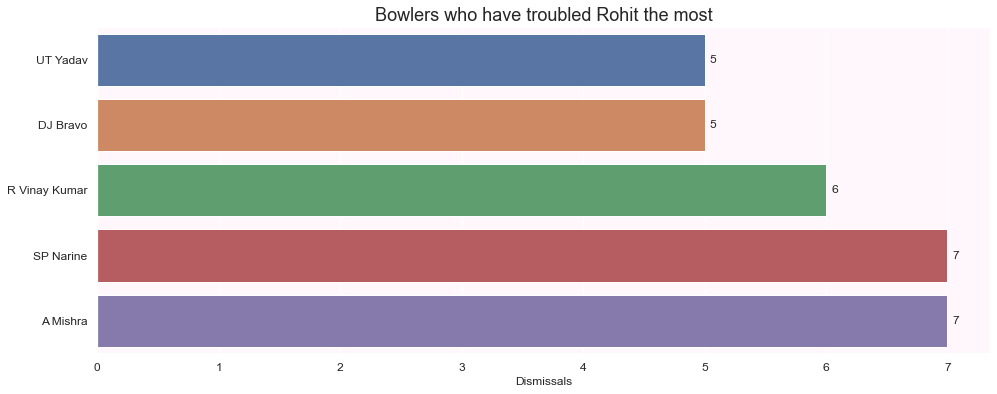

In [11]:
bowlers_who_dismissed_Rohit = Rohit_df[(Rohit_df['player_dismissed'] == Rohit) & (Rohit_df['wicket_type'] != 'run out')].groupby(['bowler'])[['match_id']].count().reset_index()
bowlers_who_dismissed_Rohit.rename(columns={'match_id': "total_dismissals"}, inplace=True)
bowlers_who_dismissed_Rohit.sort_values(by='total_dismissals', ascending=False).head(5)

plt.figure(figsize=(16, 6))
plt.rcParams['axes.facecolor'] = '#fff7fb'

ax = sns.barplot(y='bowler', x='total_dismissals', data=bowlers_who_dismissed_Rohit.sort_values(by='total_dismissals', ascending=True).tail(5), orient='h')
ax.tick_params(labelsize=12)
ax.margins(x=0.05)
ax.bar_label(
    ax.containers[0],
    padding=5,
    fontsize=12,
)

plt.title('Bowlers who have troubled Rohit the most', fontsize=18)
plt.ylabel('')
plt.xlabel('Dismissals', fontsize=12)
plt.show()

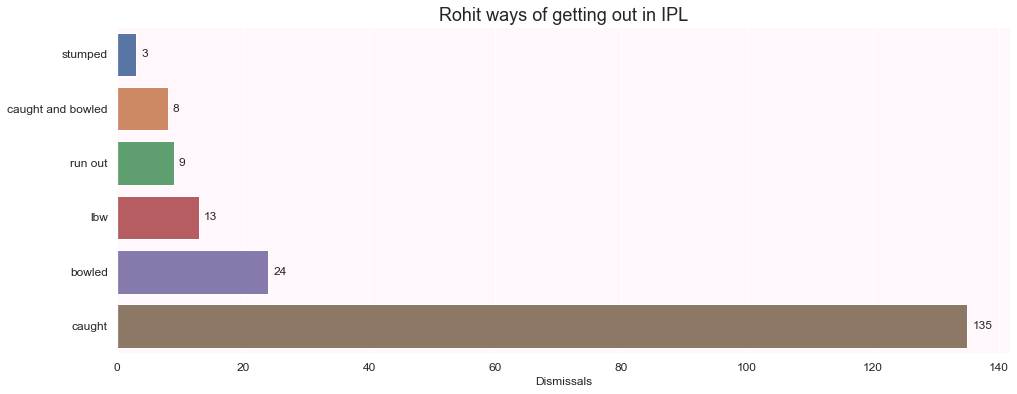

In [12]:
Rohit_dismissal_types = Rohit_df[Rohit_df['player_dismissed'] == Rohit].groupby(['wicket_type'])[['match_id']].count().reset_index()
Rohit_dismissal_types.rename(columns={'match_id': "dismissals"}, inplace=True)

plt.figure(figsize=(16, 6))
plt.rcParams['axes.facecolor'] = '#fff7fb'

ax = sns.barplot(y='wicket_type', x='dismissals', data=Rohit_dismissal_types.sort_values(by='dismissals', ascending=True), orient='h')
ax.tick_params(labelsize=12)
ax.margins(x=0.05)
ax.bar_label(
    ax.containers[0],
    padding=5,
    fontsize=12
)

plt.title('Rohit ways of getting out in IPL', fontsize=18)
plt.ylabel('')
plt.xlabel('Dismissals', fontsize=12)
plt.show()

# 2.2 Perfomance By Innings

In [13]:
Rohit_first_innings_df = Rohit_df[Rohit_df['innings'] == 1]
Rohit_second_innings_df = Rohit_df[Rohit_df['innings'] == 2]

(
    total_runs_scored, total_balls_faced, matches, strike_rate, average, number_of_fifties, number_of_hundreds, number_of_fours, number_of_sixes
) = batsman_analysis(Rohit_first_innings_df, Rohit, disable_print=True)

data_dict = {
    'innings': ['First Innings', 'Second Innings'],
    'total_runs_scored': [total_runs_scored], 'total_balls_faced': [total_balls_faced], 'strike_rate': [strike_rate], 'average': [average],
    'number_of_fifties': [number_of_fifties], 'number_of_hundreds': [number_of_hundreds], 'number_of_fours': [number_of_fours], 'number_of_sixes': [number_of_sixes]
}


(
    total_runs_scored, total_balls_faced, matches, strike_rate, average, number_of_fifties, number_of_hundreds, number_of_fours, number_of_sixes
) = batsman_analysis(Rohit_second_innings_df, Rohit, disable_print=True)

data_dict['total_runs_scored'].append(total_runs_scored)
data_dict['total_balls_faced'].append(total_balls_faced)
data_dict['strike_rate'].append(strike_rate)
data_dict['average'].append(average)
data_dict['number_of_fifties'].append(number_of_fifties)
data_dict['number_of_hundreds'].append(number_of_hundreds)
data_dict['number_of_fours'].append(number_of_fours)
data_dict['number_of_sixes'].append(number_of_sixes)

data_dict_df = pd.DataFrame(data_dict)

cm = sns.light_palette("green", as_cmap=True)

df = data_dict_df.style.background_gradient(cmap='viridis', low=.5, high=0).set_precision(2)

display(df)

,innings,total_runs_scored,total_balls_faced,strike_rate,average,number_of_fifties,number_of_hundreds,number_of_fours,number_of_sixes
0,First Innings,3415,2573,132.72,31.92,24,1,307,145
1,Second Innings,2464,2056,119.84,28.99,16,0,212,96


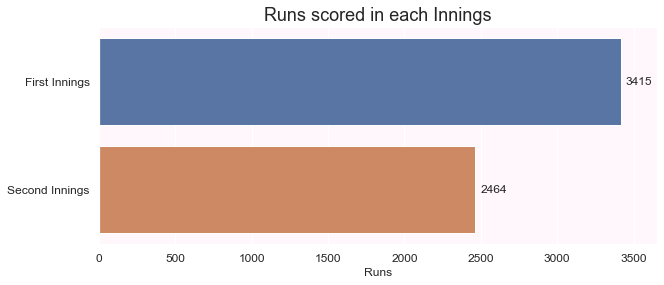

In [14]:
plt.figure(figsize=(10, 4))
plt.rcParams['axes.facecolor'] = '#fff7fb'

df = pd.DataFrame(data={'innings': data_dict['innings'], 'total_runs_scored': data_dict['total_runs_scored']})

ax = sns.barplot(y='innings', x='total_runs_scored', data=df, orient='h')
ax.tick_params(labelsize=12)
ax.margins(x=0.07)
ax.bar_label(
    ax.containers[0],
    padding=5,
    fontsize=12
)
plt.title('Runs scored in each Innings', fontsize=18)
plt.ylabel('')
plt.xlabel('Runs', fontsize=12)
plt.show()

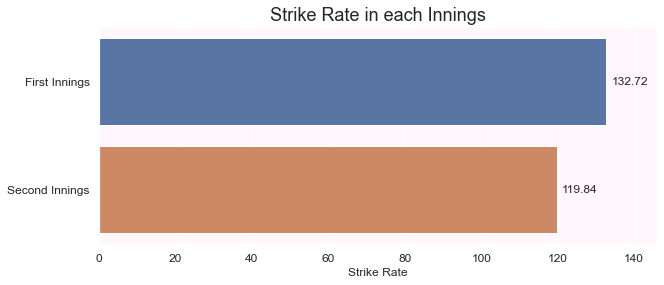

In [15]:
plt.figure(figsize=(10, 4))

df = pd.DataFrame(data={'innings': data_dict['innings'], 'strike_rate': data_dict['strike_rate']})
sns.color_palette("rocket", as_cmap=True)
ax = sns.barplot(y='innings', x='strike_rate', data=df, orient='h')
ax.tick_params(labelsize=12)
ax.margins(x=0.1)
ax.bar_label(
    ax.containers[0],
    padding=5,
    fontsize=12,
    labels=[f"{val:.02f}" for val in data_dict['strike_rate']]
)
plt.title('Strike Rate in each Innings', fontsize=18)
plt.ylabel('')
plt.xlabel('Strike Rate', fontsize=12)
plt.show()

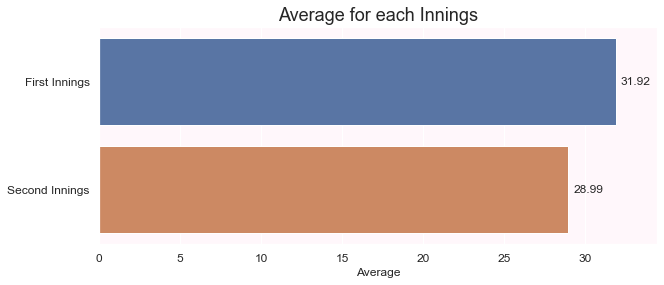

In [16]:
plt.figure(figsize=(10, 4))

df = pd.DataFrame(data={'innings': data_dict['innings'], 'average': data_dict['average']})
sns.color_palette("rocket", as_cmap=True)
ax = sns.barplot(y='innings', x='average', data=df, orient='h')
ax.tick_params(labelsize=12)
ax.margins(x=0.08)
ax.bar_label(
    ax.containers[0],
    padding=5,
    fontsize=12,
    labels=[f"{val:.02f}" for val in data_dict['average']]
)
plt.title('Average for each Innings', fontsize=18)
plt.ylabel('')
plt.xlabel('Average', fontsize=12)
plt.show()

## 2.3 Performance by stages of the Innings(Powerplay, Middle Overs and Death overs)

In [17]:
Rohit_df['over'] = Rohit_df['ball'].apply(lambda x: int(x))

Rohit_powerplay_df = Rohit_df[Rohit_df['over'] <= 6]
Rohit_middle_df = Rohit_df[(Rohit_df['over'] > 6) & (Rohit_df['over'] <= 15)]
Rohit_death_df = Rohit_df[Rohit_df['over'] > 15]

(
    total_runs_scored, total_balls_faced, matches, strike_rate, average, _, _, number_of_fours, number_of_sixes
) = batsman_analysis(Rohit_powerplay_df, Rohit, disable_print=True)

data_dict = {
    'overs': ['Powerplay (1-6 overs)', 'Middle Overs (7-15 0vers)', 'Death Overs(16-20 overs)'],
    'total_runs_scored': [total_runs_scored], 'total_balls_faced': [total_balls_faced], 'strike_rate': [strike_rate], 'average': [average],
    'number_of_fours': [number_of_fours], 'number_of_sixes': [number_of_sixes]
}

(
    total_runs_scored, total_balls_faced, matches, strike_rate, average, _, _, number_of_fours, number_of_sixes
) = batsman_analysis(Rohit_middle_df, Rohit, disable_print=True)

data_dict['total_runs_scored'].append(total_runs_scored)
data_dict['total_balls_faced'].append(total_balls_faced)
data_dict['strike_rate'].append(strike_rate)
data_dict['average'].append(average)
data_dict['number_of_fours'].append(number_of_fours)
data_dict['number_of_sixes'].append(number_of_sixes)

(
    total_runs_scored, total_balls_faced, matches, strike_rate, average, _, _, number_of_fours, number_of_sixes
) = batsman_analysis(Rohit_death_df, Rohit, disable_print=True)

data_dict['total_runs_scored'].append(total_runs_scored)
data_dict['total_balls_faced'].append(total_balls_faced)
data_dict['strike_rate'].append(strike_rate)
data_dict['average'].append(average)
data_dict['number_of_fours'].append(number_of_fours)
data_dict['number_of_sixes'].append(number_of_sixes)

data_dict_df = pd.DataFrame(data_dict)
#cm = sns.light_palette("", as_cmap=True)
df = data_dict_df.style.background_gradient(cmap='viridis', low=.5, high=0).set_precision(2)
display(df)

,overs,total_runs_scored,total_balls_faced,strike_rate,average,number_of_fours,number_of_sixes
0,Powerplay (1-6 overs),1892,1686,112.22,29.56,203,70
1,Middle Overs (7-15 0vers),2842,2338,121.56,35.52,226,93
2,Death Overs(16-20 overs),1145,605,189.26,23.85,90,78


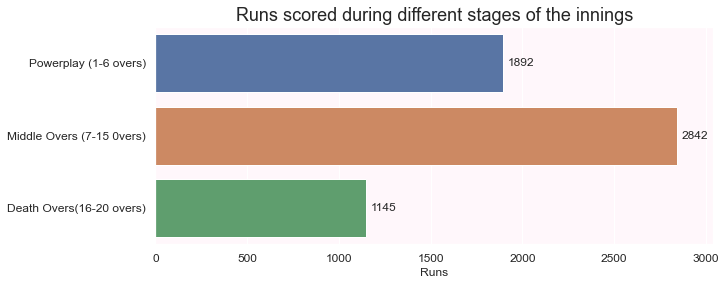

In [18]:
plt.figure(figsize=(10, 4))
plt.rcParams['axes.facecolor'] = '#fff7fb'

df = pd.DataFrame(data={'overs': data_dict['overs'], 'total_runs_scored': data_dict['total_runs_scored']})

ax = sns.barplot(y='overs', x='total_runs_scored', data=df, orient='h')
ax.tick_params(labelsize=12)
ax.margins(x=0.07)
ax.bar_label(
    ax.containers[0],
    padding=5,
    fontsize=12
)
plt.title('Runs scored during different stages of the innings', fontsize=18)
plt.ylabel('')
plt.xlabel('Runs', fontsize=12)
plt.show()


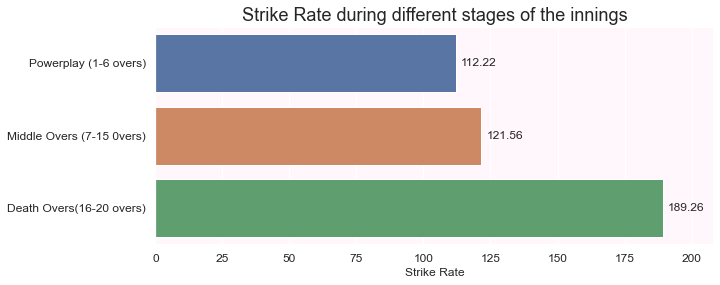

In [19]:
plt.figure(figsize=(10, 4))
plt.rcParams['axes.facecolor'] = '#fff7fb'

df = pd.DataFrame(data={'overs': data_dict['overs'], 'strike_rate': data_dict['strike_rate']})

ax = sns.barplot(y='overs', x='strike_rate', data=df, orient='h')
ax.tick_params(labelsize=12)
ax.margins(x=0.1)
ax.bar_label(
    ax.containers[0],
    padding=5,
    fontsize=12,
    labels=[f"{val:.02f}" for val in data_dict['strike_rate']]
)
plt.title('Strike Rate during different stages of the innings', fontsize=18)
plt.ylabel('')
plt.xlabel('Strike Rate', fontsize=12)
plt.show()

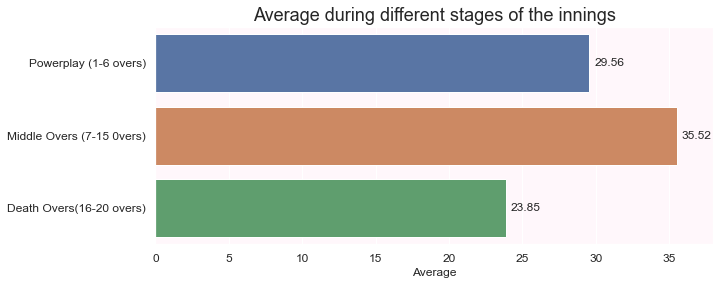

In [20]:
plt.figure(figsize=(10, 4))
plt.rcParams['axes.facecolor'] = '#fff7fb'

df = pd.DataFrame(data={'overs': data_dict['overs'], 'average': data_dict['average']})

ax = sns.barplot(y='overs', x='average', data=df, orient='h')
ax.tick_params(labelsize=12)
ax.margins(x=0.07)
ax.bar_label(
    ax.containers[0],
    padding=5,
    fontsize=12,
    labels=[f"{val:.02f}" for val in data_dict['average']]
)
plt.title('Average during different stages of the innings', fontsize=18)
plt.ylabel('')
plt.xlabel('Average', fontsize=12)
plt.show()

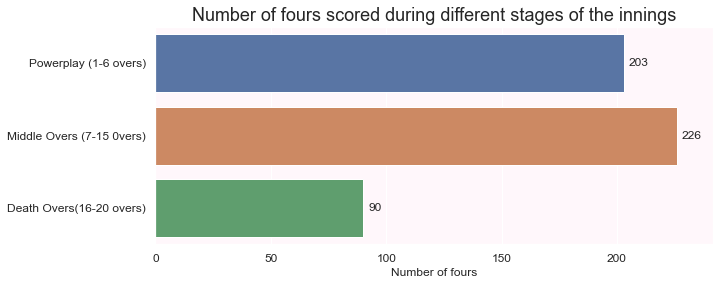

In [21]:
plt.figure(figsize=(10, 4))
plt.rcParams['axes.facecolor'] = '#fff7fb'

df = pd.DataFrame(data={'overs': data_dict['overs'], 'number_of_fours': data_dict['number_of_fours']})

ax = sns.barplot(y='overs', x='number_of_fours', data=df, orient='h')
ax.tick_params(labelsize=12)
ax.margins(x=0.07)
ax.bar_label(
    ax.containers[0],
    padding=5,
    fontsize=12
)
plt.title('Number of fours scored during different stages of the innings', fontsize=18)
plt.ylabel('')
plt.xlabel('Number of fours', fontsize=12)
plt.show()

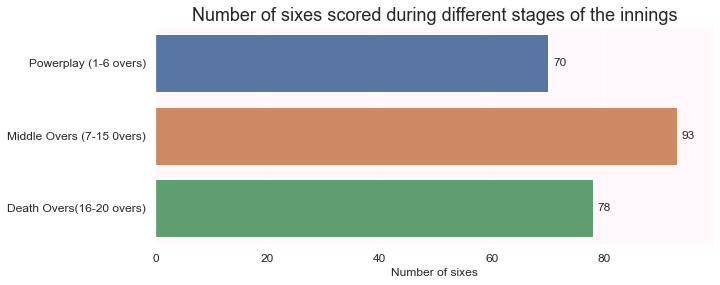

In [22]:
plt.figure(figsize=(10, 4))
plt.rcParams['axes.facecolor'] = '#fff7fb'

df = pd.DataFrame(data={'overs': data_dict['overs'], 'number_of_sixes': data_dict['number_of_sixes']})

ax = sns.barplot(y='overs', x='number_of_sixes', data=df, orient='h')
ax.tick_params(labelsize=12)
ax.margins(x=0.07)
ax.bar_label(
    ax.containers[0],
    padding=5,
    fontsize=12
)
plt.title('Number of sixes scored during different stages of the innings', fontsize=18)
plt.ylabel('')
plt.xlabel('Number of sixes', fontsize=12)
plt.show()


# 2.4 Dot balls vs Boundry balls percentage

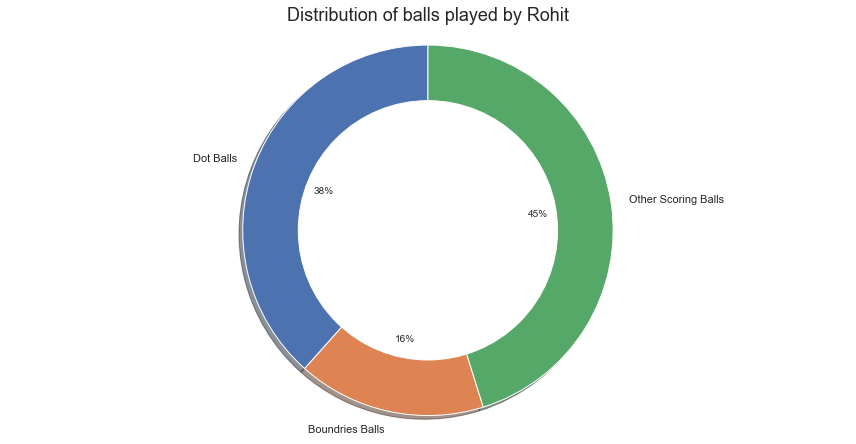

In [25]:
dot_balls = Rohit_df[Rohit_df['runs_off_bat'] == 0].shape[0]
boundries = Rohit_df[(Rohit_df['runs_off_bat'] == 4) | (Rohit_df['runs_off_bat'] == 6)].shape[0]
other_scoring_balls = Rohit_df[(Rohit_df['runs_off_bat'] != 0) & (Rohit_df['runs_off_bat'] != 4) & (Rohit_df['runs_off_bat'] != 6)].shape[0]
total_balls_faced = Rohit_df.shape[0]
dot_balls_percentage = round((dot_balls / total_balls_faced) * 100, 2)
boundries_percentage = round((boundries / total_balls_faced) * 100, 2)
other_scoring_balls_percentage = round((other_scoring_balls / total_balls_faced) * 100, 2)

plt.figure(figsize=(12, 6))

data = [dot_balls_percentage, boundries_percentage, other_scoring_balls_percentage]
keys = ['Dot Balls', 'Boundries Balls', 'Other Scoring Balls']
  
palette_color = sns.color_palette()
  
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%', shadow=True, startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.title('Distribution of balls played by Rohit', fontsize=18)
plt.show()  

## 2.5 Performance by Seasons

In [24]:
Rohit_total_runs_by_season = Rohit_df.groupby('season')[['runs_off_bat']].sum().reset_index()
Rohit_total_balls_faced_by_season = Rohit_df.groupby('season')[['runs_off_bat']].count().reset_index()
Rohit_innings_per_season = Rohit_df.groupby('season')[['match_id']].nunique().reset_index()
Rohit_dismisals_per_season = Rohit_df[Rohit_df['player_dismissed'] == Rohit].groupby('season')[['match_id']].nunique().reset_index()
Rohit_total_runs_by_season['balls_faced'] = Rohit_total_balls_faced_by_season['runs_off_bat']
Rohit_total_runs_by_season['strike_rate'] = round((Rohit_total_runs_by_season['runs_off_bat'] / Rohit_total_runs_by_season['balls_faced']) * 100, 3)
Rohit_total_runs_by_season['number_of_innings'] = Rohit_innings_per_season['match_id']
Rohit_total_runs_by_season['number_of_dismissals'] = Rohit_dismisals_per_season['match_id']
Rohit_total_runs_by_season['average'] = round(Rohit_total_runs_by_season['runs_off_bat'] / Rohit_total_runs_by_season['number_of_dismissals'], 3)

display(Rohit_total_runs_by_season.style.background_gradient(cmap='viridis', low=.5, high=0).set_precision(2))

,season,runs_off_bat,balls_faced,strike_rate,number_of_innings,number_of_dismissals,average
0,2008,404,276,146.38,12,11,36.73
1,2009,362,323,112.07,16,13,27.85
2,2010,404,310,130.32,16,14,28.86
3,2011,372,304,122.37,13,10,37.20
4,2012,433,350,123.71,16,14,30.93
5,2013,538,415,129.64,19,14,38.43
6,2014,390,307,127.04,15,13,30.00
7,2015,482,339,142.18,16,14,34.43
8,2016,489,372,131.45,14,11,44.45
9,2017,333,278,119.78,16,14,23.79


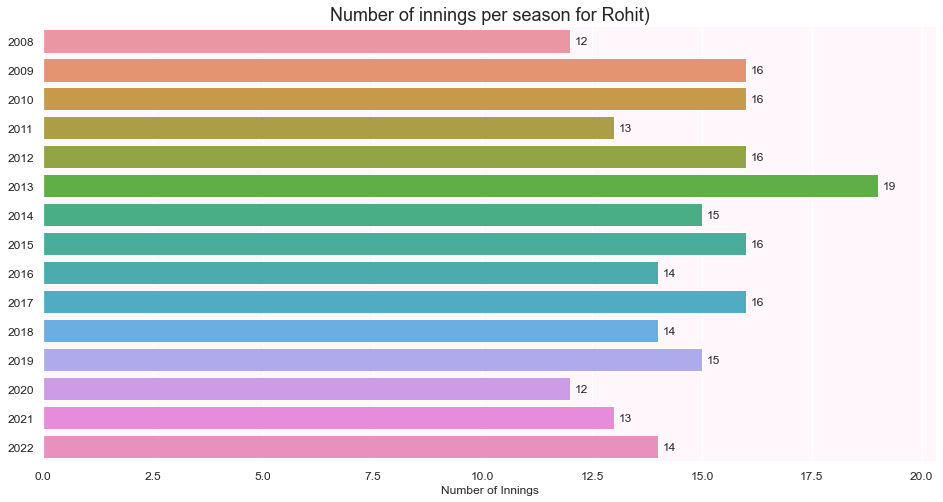

In [26]:
# Number of matches per season
matches_per_season = Rohit_df.groupby(['season'])[['match_id']].nunique().reset_index()
# Rename match_id column to match_counts column in matches_per_season df
matches_per_season.rename(columns={'match_id': 'match_counts'}, inplace=True)

plt.figure(figsize=(16, 8))

ax = sns.barplot(y='season', x='match_counts', data=matches_per_season, orient='h')
ax.tick_params(labelsize=12)
ax.margins(x=0.07)
ax.bar_label(
    ax.containers[0],
    padding=5,
    fontsize=12
)
plt.title('Number of innings per season for Rohit)', fontsize=18)
plt.ylabel('')
plt.xlabel('Number of Innings', fontsize=12)
plt.show()

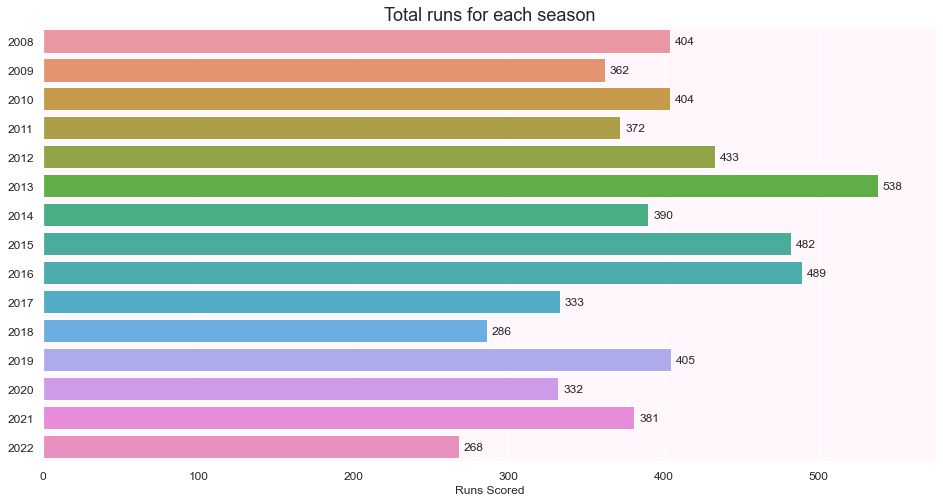

In [27]:
plt.figure(figsize=(16, 8))

ax = sns.barplot(y='season', x='runs_off_bat', data=Rohit_total_runs_by_season, orient='h')
ax.tick_params(labelsize=12)
ax.margins(x=0.07)
ax.bar_label(
    ax.containers[0],
    padding=5,
    fontsize=12
)
plt.title('Total runs for each season', fontsize=18)
plt.ylabel('')
plt.xlabel('Runs Scored', fontsize=12)
plt.show()

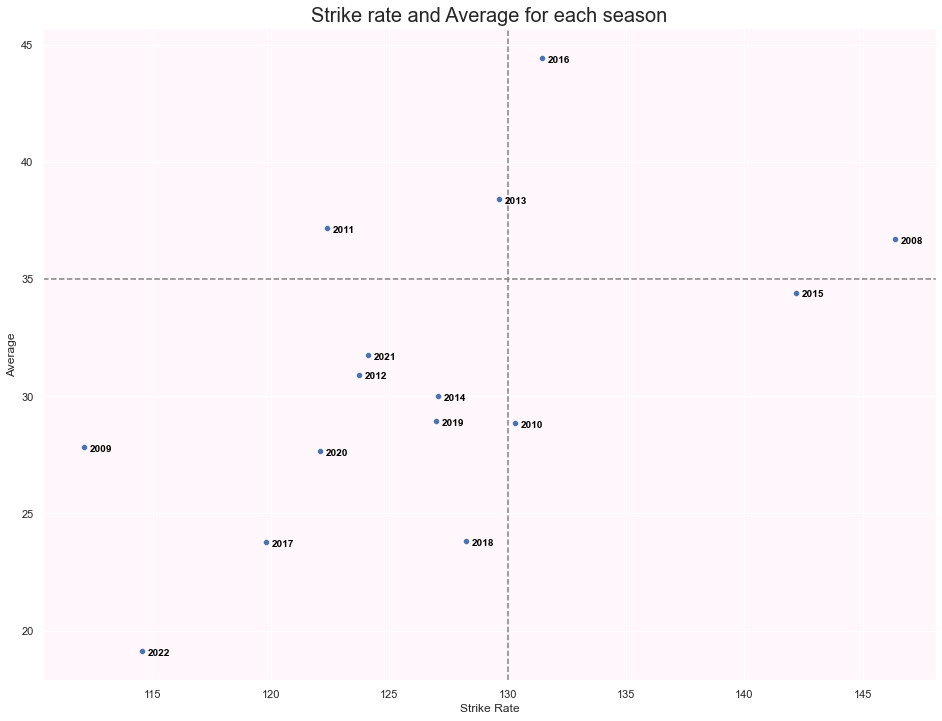

In [28]:
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = '#fff7fb'

required_df = Rohit_total_runs_by_season[['season', 'strike_rate', 'average']]
p1 = sns.scatterplot(x='strike_rate', y='average', data=required_df)

for line in range(required_df.shape[0]):
    p1.text(
        required_df.iloc[line, 1] + 0.25,
        required_df.iloc[line, 2] - 0.2, 
        required_df.iloc[line, 0],
        size='medium',
        color='black',
        weight='semibold'
    )
plt.axvline(130, ls='--', color='grey')
plt.axhline(35, ls='--', color='grey')        
plt.title('Strike rate and Average for each season', fontsize=20)
plt.xlabel('Strike Rate')
plt.ylabel('Average')
plt.show()

# 3.0 Rohit Against All Batsmans

In [29]:
full_df['over'] = full_df['ball'].apply(lambda x: int(x))

total_scores_by_each_batsman = full_df.groupby('striker')[['runs_off_bat']].sum().reset_index()
total_scores_by_each_batsman.sort_values(by='runs_off_bat', ascending=False, inplace=True)

total_balls_faced_by_each_batsman = full_df.groupby('striker')[['runs_off_bat']].count().reset_index()
total_balls_faced_by_each_batsman.rename(columns={'runs_off_bat': 'total_balls_faced'}, inplace=True)

number_of_innings_for_each_batsman = full_df.groupby('striker')[['match_id']].nunique().reset_index()
number_of_innings_for_each_batsman.rename(columns={'match_id': 'number_of_innings'}, inplace=True)

number_of_dismisals_for_each_batsman = full_df[full_df['player_dismissed'] == full_df['striker']].groupby('striker')[['match_id']].nunique().reset_index()
number_of_dismisals_for_each_batsman.rename(columns={'match_id': 'number_of_dismisals'}, inplace=True)

total_runs_per_match_for_each_batsman = full_df.groupby(['striker', 'match_id'])[['runs_off_bat']].sum().reset_index()

runs_scored_in_powerplay_for_each_batsman = full_df[full_df['over'] < 6].groupby('striker')[['runs_off_bat']].sum().reset_index()
balls_faced_in_powerplay_for_each_batsman = full_df[full_df['over'] < 6].groupby('striker')[['runs_off_bat']].count().reset_index()
dismisals_in_powerplay_for_each_batsman = full_df[(full_df['over'] < 6) & (full_df['player_dismissed'] == full_df['striker'])].groupby('striker')[['match_id']].nunique().reset_index()
runs_scored_in_powerplay_for_each_batsman.rename(columns={'runs_off_bat': 'runs_scored_in_powerplay'}, inplace=True)
balls_faced_in_powerplay_for_each_batsman.rename(columns={'runs_off_bat': 'balls_faced_in_powerplay'}, inplace=True)
dismisals_in_powerplay_for_each_batsman.rename(columns={'match_id': 'dismisals_in_powerplay'}, inplace=True)

runs_scored_in_middle_overs_for_each_batsman = full_df[(full_df['over'] >= 6) & (full_df['over'] < 15)].groupby('striker')[['runs_off_bat']].sum().reset_index()
balls_faced_in_middle_overs_for_each_batsman = full_df[(full_df['over'] >= 6) & (full_df['over'] < 15)].groupby('striker')[['runs_off_bat']].count().reset_index()
dismisals_in_middle_overs_for_each_batsman = full_df[(full_df['over'] >= 6) & (full_df['over'] < 15) & (full_df['player_dismissed'] == full_df['striker'])].groupby('striker')[['match_id']].nunique().reset_index()
runs_scored_in_middle_overs_for_each_batsman.rename(columns={'runs_off_bat': 'runs_scored_in_middle_overs'}, inplace=True)
balls_faced_in_middle_overs_for_each_batsman.rename(columns={'runs_off_bat': 'balls_faced_in_middle_overs'}, inplace=True)
dismisals_in_middle_overs_for_each_batsman.rename(columns={'match_id': 'dismisals_in_middle_overs'}, inplace=True)

runs_scored_in_death_overs_for_each_batsman = full_df[full_df['over'] >= 15].groupby('striker')[['runs_off_bat']].sum().reset_index()
balls_faced_in_death_overs_for_each_batsman = full_df[full_df['over'] >= 15].groupby('striker')[['runs_off_bat']].count().reset_index()
dismisals_in_death_overs_for_each_batsman = full_df[(full_df['over'] >= 15) & (full_df['player_dismissed'] == full_df['striker'])].groupby('striker')[['match_id']].nunique().reset_index()
runs_scored_in_death_overs_for_each_batsman.rename(columns={'runs_off_bat': 'runs_scored_in_death_overs'}, inplace=True)
balls_faced_in_death_overs_for_each_batsman.rename(columns={'runs_off_bat': 'balls_faced_in_death_overs'}, inplace=True)
dismisals_in_death_overs_for_each_batsman.rename(columns={'match_id': 'dismisals_in_death_overs'}, inplace=True)

dot_balls_for_each_batsman = full_df[full_df['runs_off_bat'] == 0].groupby('striker')[['runs_off_bat']].count().reset_index()
dot_balls_for_each_batsman.rename(columns={'runs_off_bat': 'dot_balls'}, inplace=True)

boundry_balls_for_each_batsman = full_df[full_df['runs_off_bat'] >= 4].groupby('striker')[['runs_off_bat']].count().reset_index()
boundry_balls_for_each_batsman.rename(columns={'runs_off_bat': 'boundry_balls'}, inplace=True)

runs_scored_in_first_innings_for_each_batsman = full_df[full_df['innings'] == 1].groupby('striker')[['runs_off_bat']].sum().reset_index()
balls_faced_in_first_innings_for_each_batsman = full_df[full_df['innings'] == 1].groupby('striker')[['runs_off_bat']].count().reset_index()
dismissals_in_first_innings_for_each_batsman = full_df[(full_df['innings'] == 1) & (full_df['player_dismissed'] == full_df['striker'])].groupby('striker')[['match_id']].nunique().reset_index()
runs_scored_in_first_innings_for_each_batsman.rename(columns={'runs_off_bat': 'runs_scored_in_first_innings'}, inplace=True)
balls_faced_in_first_innings_for_each_batsman.rename(columns={'runs_off_bat': 'balls_faced_in_first_innings'}, inplace=True)
dismissals_in_first_innings_for_each_batsman.rename(columns={'match_id': 'dismissals_in_first_innings'}, inplace=True)

runs_scored_in_second_innings_for_each_batsman = full_df[full_df['innings'] == 2].groupby('striker')[['runs_off_bat']].sum().reset_index()
balls_faced_in_second_innings_for_each_batsman = full_df[full_df['innings'] == 2].groupby('striker')[['runs_off_bat']].count().reset_index()
dismissals_in_second_innings_for_each_batsman = full_df[(full_df['innings'] == 2) & (full_df['player_dismissed'] == full_df['striker'])].groupby('striker')[['match_id']].nunique().reset_index()
runs_scored_in_second_innings_for_each_batsman.rename(columns={'runs_off_bat': 'runs_scored_in_second_innings'}, inplace=True)
balls_faced_in_second_innings_for_each_batsman.rename(columns={'runs_off_bat': 'balls_faced_in_second_innings'}, inplace=True)
dismissals_in_second_innings_for_each_batsman.rename(columns={'match_id': 'dismissals_in_second_innings'}, inplace=True)

number_of_fifties_for_each_batsman = total_runs_per_match_for_each_batsman[
    (total_runs_per_match_for_each_batsman['runs_off_bat'] >= 50) &
    (total_runs_per_match_for_each_batsman['runs_off_bat'] < 100)
].groupby('striker')[['match_id']].count().reset_index()
number_of_fifties_for_each_batsman.rename(columns={'match_id': '50s'}, inplace=True)

number_of_hundreds_for_each_batsman = total_runs_per_match_for_each_batsman[
    (total_runs_per_match_for_each_batsman['runs_off_bat'] >= 100)
].groupby('striker')[['match_id']].count().reset_index()
number_of_hundreds_for_each_batsman.rename(columns={'match_id': '100s'}, inplace=True)


number_of_fours_by_each_batsman = full_df[
    full_df['runs_off_bat'] == 4
].groupby('striker')[['runs_off_bat']].count().reset_index()
number_of_fours_by_each_batsman.rename(columns={'runs_off_bat': '4s'}, inplace=True)

number_of_sixes_by_each_batsman = full_df[
    full_df['runs_off_bat'] == 6
].groupby('striker')[['runs_off_bat']].count().reset_index()
number_of_sixes_by_each_batsman.rename(columns={'runs_off_bat': '6s'}, inplace=True)

total_scores_by_each_batsman = total_scores_by_each_batsman.merge(total_balls_faced_by_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(number_of_innings_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(number_of_fifties_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(number_of_hundreds_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(number_of_sixes_by_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(number_of_fours_by_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(number_of_dismisals_for_each_batsman, on='striker', how='left')

total_scores_by_each_batsman = total_scores_by_each_batsman.merge(runs_scored_in_powerplay_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(balls_faced_in_powerplay_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(dismisals_in_powerplay_for_each_batsman, on='striker', how='left')

total_scores_by_each_batsman = total_scores_by_each_batsman.merge(runs_scored_in_middle_overs_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(balls_faced_in_middle_overs_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(dismisals_in_middle_overs_for_each_batsman, on='striker', how='left')

total_scores_by_each_batsman = total_scores_by_each_batsman.merge(runs_scored_in_death_overs_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(balls_faced_in_death_overs_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(dismisals_in_death_overs_for_each_batsman, on='striker', how='left')

total_scores_by_each_batsman = total_scores_by_each_batsman.merge(dot_balls_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(boundry_balls_for_each_batsman, on='striker', how='left')

total_scores_by_each_batsman = total_scores_by_each_batsman.merge(runs_scored_in_first_innings_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(runs_scored_in_second_innings_for_each_batsman, on='striker', how='left')

total_scores_by_each_batsman = total_scores_by_each_batsman.merge(balls_faced_in_first_innings_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(balls_faced_in_second_innings_for_each_batsman, on='striker', how='left')

total_scores_by_each_batsman = total_scores_by_each_batsman.merge(dismissals_in_first_innings_for_each_batsman, on='striker', how='left')
total_scores_by_each_batsman = total_scores_by_each_batsman.merge(dismissals_in_second_innings_for_each_batsman, on='striker', how='left')

total_scores_by_each_batsman.fillna(0, inplace=True)

total_scores_by_each_batsman['strike_rate'] = round((total_scores_by_each_batsman['runs_off_bat'] / total_scores_by_each_batsman['total_balls_faced']) * 100, 3)
total_scores_by_each_batsman['average'] = round(total_scores_by_each_batsman['runs_off_bat'] / total_scores_by_each_batsman['number_of_dismisals'], 3)
total_scores_by_each_batsman['innings_per_fifty'] = round(total_scores_by_each_batsman['number_of_innings'] / total_scores_by_each_batsman['50s'], 3)
total_scores_by_each_batsman['innings_per_hundred'] = round(total_scores_by_each_batsman['number_of_innings'] / total_scores_by_each_batsman['100s'], 3)

total_scores_by_each_batsman['strike_rate_powerplay'] = round((total_scores_by_each_batsman['runs_scored_in_powerplay'] / total_scores_by_each_batsman['balls_faced_in_powerplay']) * 100, 3)
total_scores_by_each_batsman['strike_rate_middle_overs'] = round((total_scores_by_each_batsman['runs_scored_in_middle_overs'] / total_scores_by_each_batsman['balls_faced_in_middle_overs']) * 100, 3)
total_scores_by_each_batsman['strike_rate_death_overs'] = round((total_scores_by_each_batsman['runs_scored_in_death_overs'] / total_scores_by_each_batsman['balls_faced_in_death_overs']) * 100, 3)

total_scores_by_each_batsman['average_powerplay'] = round(total_scores_by_each_batsman['runs_scored_in_powerplay'] / total_scores_by_each_batsman['dismisals_in_powerplay'], 3)
total_scores_by_each_batsman['average_middle_overs'] = round(total_scores_by_each_batsman['runs_scored_in_middle_overs'] / total_scores_by_each_batsman['dismisals_in_middle_overs'], 3)
total_scores_by_each_batsman['average_death_overs'] = round(total_scores_by_each_batsman['runs_scored_in_death_overs'] / total_scores_by_each_batsman['dismisals_in_death_overs'], 3)

total_scores_by_each_batsman['dot_balls_percentage'] = round((total_scores_by_each_batsman['dot_balls'] / total_scores_by_each_batsman['total_balls_faced']) * 100, 3)
total_scores_by_each_batsman['boundry_balls_percentage'] = round((total_scores_by_each_batsman['boundry_balls'] / total_scores_by_each_batsman['total_balls_faced']) * 100, 3)

total_scores_by_each_batsman['strike_rate_first_innings'] = round((total_scores_by_each_batsman['runs_scored_in_first_innings'] / total_scores_by_each_batsman['balls_faced_in_first_innings']) * 100, 3)
total_scores_by_each_batsman['average_first_innings'] = round(total_scores_by_each_batsman['runs_scored_in_first_innings'] / total_scores_by_each_batsman['dismissals_in_first_innings'], 3)

total_scores_by_each_batsman['strike_rate_second_innings'] = round((total_scores_by_each_batsman['runs_scored_in_second_innings'] / total_scores_by_each_batsman['balls_faced_in_second_innings']) * 100, 3)
total_scores_by_each_batsman['average_second_innings'] = round(total_scores_by_each_batsman['runs_scored_in_second_innings'] / total_scores_by_each_batsman['dismissals_in_second_innings'], 3)

display(total_scores_by_each_batsman.head(10))

,striker,runs_off_bat,total_balls_faced,number_of_innings,50s,100s,6s,4s,number_of_dismisals,runs_scored_in_powerplay,balls_faced_in_powerplay,dismisals_in_powerplay,runs_scored_in_middle_overs,balls_faced_in_middle_overs,dismisals_in_middle_overs,runs_scored_in_death_overs,balls_faced_in_death_overs,dismisals_in_death_overs,dot_balls,boundry_balls,runs_scored_in_first_innings,runs_scored_in_second_innings,balls_faced_in_first_innings,balls_faced_in_second_innings,dismissals_in_first_innings,dismissals_in_second_innings,strike_rate,average,innings_per_fifty,innings_per_hundred,strike_rate_powerplay,strike_rate_middle_overs,strike_rate_death_overs,average_powerplay,average_middle_overs,average_death_overs,dot_balls_percentage,boundry_balls_percentage,strike_rate_first_innings,average_first_innings,strike_rate_second_innings,average_second_innings
0,V Kohli,6624,5262,215,44.0,5.0,219.0,579.0,181.0,2125.0,1877.0,57.0,3201.0,2660.0,71.0,1298.0,725.0,53.0,1886.0,798.0,3554.0,3070.0,2848.0,2414.0,98.0,83.0,125.884,36.597,4.886,43.000,113.213,120.338,179.034,37.281,45.085,24.491,35.842,15.165,124.789,36.265,127.175,36.988
1,S Dhawan,6244,5081,205,47.0,2.0,137.0,701.0,173.0,3157.0,2654.0,83.0,2501.0,2047.0,74.0,586.0,380.0,16.0,1958.0,840.0,3537.0,2707.0,2883.0,2198.0,107.0,66.0,122.889,36.092,4.362,102.500,118.953,122.179,154.211,38.036,33.797,36.625,38.536,16.532,122.685,33.056,123.157,41.015
2,DA Warner,5881,4308,162,55.0,4.0,216.0,577.0,135.0,2892.0,2191.0,62.0,2393.0,1785.0,51.0,596.0,332.0,22.0,1633.0,794.0,3042.0,2839.0,2256.0,2052.0,70.0,65.0,136.513,43.563,2.945,40.500,131.995,134.062,179.518,46.645,46.922,27.091,37.906,18.431,134.840,43.457,138.353,43.677
3,RG Sharma,5879,4629,221,40.0,1.0,241.0,519.0,192.0,1632.0,1425.0,54.0,2766.0,2358.0,78.0,1481.0,846.0,60.0,1778.0,761.0,3415.0,2464.0,2573.0,2056.0,107.0,85.0,127.004,30.620,5.525,221.000,114.526,117.303,175.059,30.222,35.462,24.683,38.410,16.440,132.724,31.916,119.844,28.988
4,SK Raina,5528,4174,200,39.0,1.0,203.0,506.0,161.0,1552.0,1207.0,44.0,3077.0,2423.0,92.0,899.0,544.0,25.0,1475.0,710.0,3194.0,2334.0,2422.0,1752.0,93.0,68.0,132.439,34.335,5.128,200.000,128.583,126.991,165.257,35.273,33.446,35.960,35.338,17.010,131.874,34.344,133.219,34.324
5,AB de Villiers,5162,3479,170,40.0,3.0,251.0,413.0,122.0,722.0,622.0,22.0,2572.0,1990.0,60.0,1868.0,867.0,40.0,1113.0,664.0,3163.0,1999.0,1997.0,1482.0,65.0,57.0,148.376,42.311,4.250,56.667,116.077,129.246,215.456,32.818,42.867,46.700,31.992,19.086,158.388,48.662,134.885,35.070
6,MS Dhoni,4978,3802,205,24.0,0.0,229.0,346.0,124.0,59.0,78.0,2.0,1892.0,1910.0,38.0,3027.0,1814.0,84.0,1370.0,575.0,2923.0,2055.0,2179.0,1623.0,72.0,52.0,130.931,40.145,8.542,inf,75.641,99.058,166.869,29.500,49.789,36.036,36.034,15.124,134.144,40.597,126.617,39.519
7,CH Gayle,4965,3502,141,31.0,6.0,357.0,405.0,124.0,2373.0,1837.0,64.0,2011.0,1361.0,45.0,581.0,304.0,15.0,1634.0,762.0,2873.0,2092.0,1959.0,1543.0,71.0,53.0,141.776,40.040,4.548,23.500,129.178,147.759,191.118,37.078,44.689,38.733,46.659,21.759,146.656,40.465,135.580,39.472
8,RV Uthappa,4952,3925,197,27.0,0.0,182.0,481.0,175.0,2035.0,1695.0,60.0,2350.0,1887.0,91.0,567.0,343.0,24.0,1598.0,666.0,2120.0,2832.0,1752.0,2173.0,74.0,101.0,126.166,28.297,7.296,inf,120.059,124.536,165.306,33.917,25.824,23.625,40.713,16.968,121.005,28.649,130.327,28.040
9,KD Karthik,4376,3383,207,20.0,0.0,134.0,426.0,156.0,396.0,411.0,9.0,2432.0,2030.0,85.0,1548.0,942.0,62.0,1219.0,563.0,2497.0,1879.0,1893.0,1490.0,82.0,74.0,129.353,28.051,10.350,inf,96.350,119.803,164.331,44.000,28.612,24.968,36.033,16.642,131.907,30.451,126.107,25.392


## 3.1 Overall Comparison

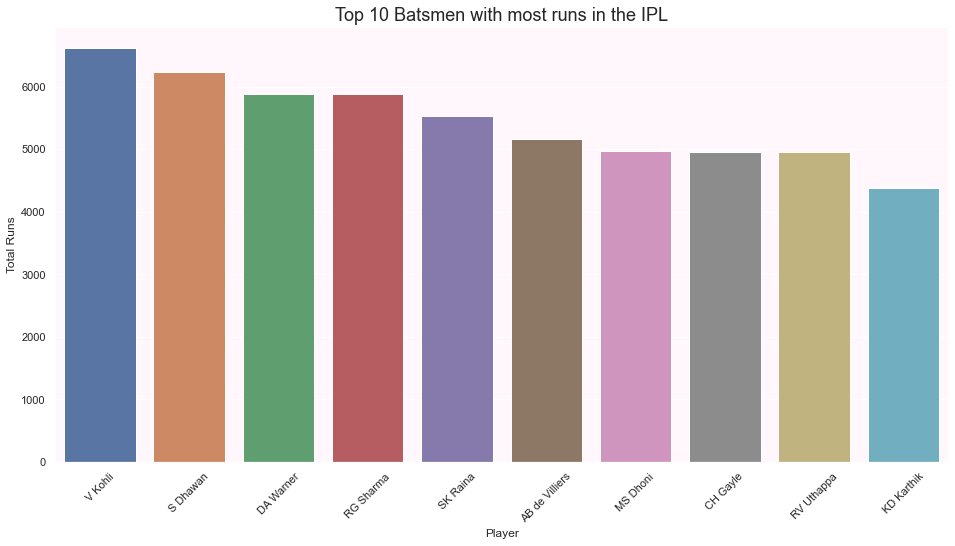

In [30]:
plt.figure(figsize=(16, 8))

sns.barplot(
    x='striker',
    y='runs_off_bat',
    data=total_scores_by_each_batsman[total_scores_by_each_batsman['runs_off_bat'] >= 1000].sort_values(by='runs_off_bat', ascending=False).head(10)
)

plt.title('Top 10 Batsmen with most runs in the IPL', fontsize=18)
plt.xlabel('Player')
plt.xticks(rotation=45)
plt.ylabel('Total Runs')
plt.show()

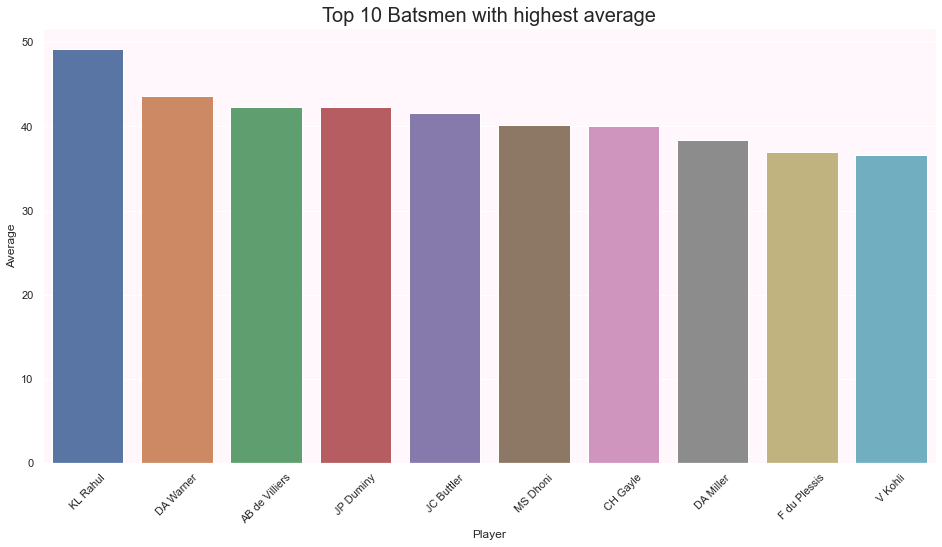

In [31]:
plt.figure(figsize=(16, 8))

sns.barplot(
    x='striker',
    y='average',
    data=total_scores_by_each_batsman[total_scores_by_each_batsman['number_of_innings'] >= 75].sort_values(by='average', ascending=False).head(10)
)

plt.title('Top 10 Batsmen with highest average', fontsize=20)
plt.xlabel('Player')
plt.xticks(rotation=45)
plt.ylabel('Average')
plt.show()

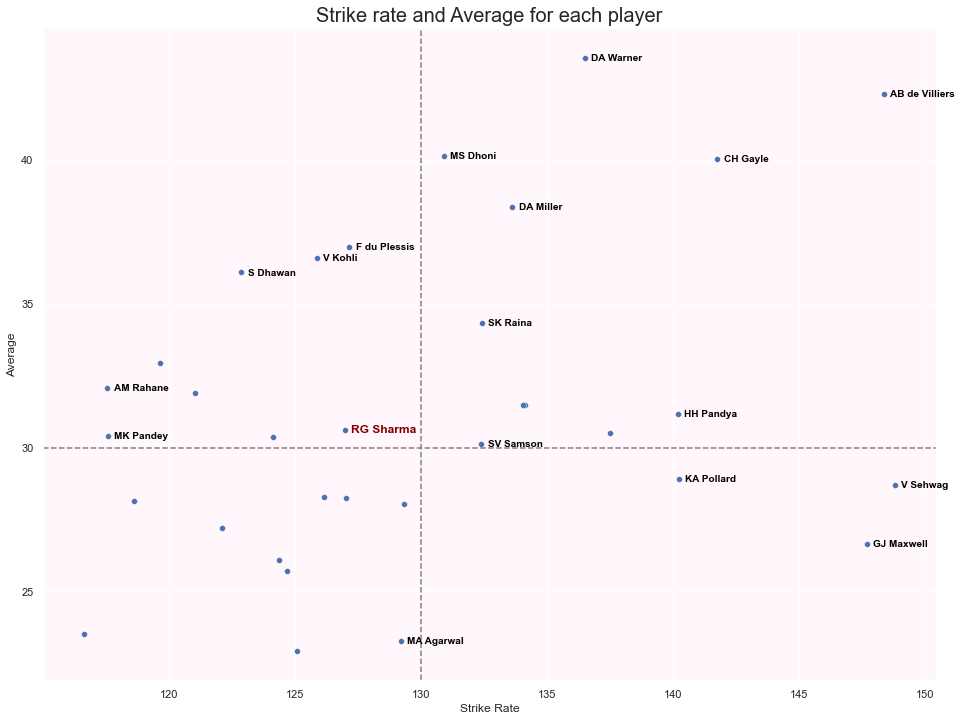

In [34]:
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = '#fff7fb'

required_df = total_scores_by_each_batsman[total_scores_by_each_batsman['number_of_innings'] >= 100][['striker', 'strike_rate', 'average']]
p1 = sns.scatterplot(x='strike_rate', y='average', data=required_df)

for line in range(required_df.shape[0]):
    if required_df.iloc[line, 0] == 'RG Sharma':
        p1.text(
            required_df.iloc[line, 1] + .25,
            required_df.iloc[line, 2] - 0.1, 
            required_df.iloc[line, 0],
            size='large',
            color='maroon',
            weight='bold'
        )
    elif required_df.iloc[line, 0] in [
        'MS Dhoni', 'AB de Villiers', 'DA Warner', 'CH Gayle', 'DA Miller', 'SK Raina',
        'RA Tripathi', 'V Kohli', 'JC Buttle',
        'SV Samson', 'KL Rahul', 'MA Agarwal',
        'V Sehwag', 'GJ Maxwell', 'KA Pollard', 'HH Pandya',
        'F du Plessis', 'S Dhawan', 'RG Sharma', 'MK Pandey', 'AM Rahane'
    ]:
        p1.text(
            required_df.iloc[line, 1] + 0.25,
            required_df.iloc[line, 2] - 0.1, 
            required_df.iloc[line, 0],
            size='medium',
            color='black',
            weight='semibold'
        )
plt.axvline(130, ls='--', color='grey')
plt.axhline(30, ls='--', color='grey')        
plt.title('Strike rate and Average for each player', fontsize=20)
plt.xlabel('Strike Rate')
plt.ylabel('Average')
plt.show()

## 3.2 Comparison at different stages of the Innings

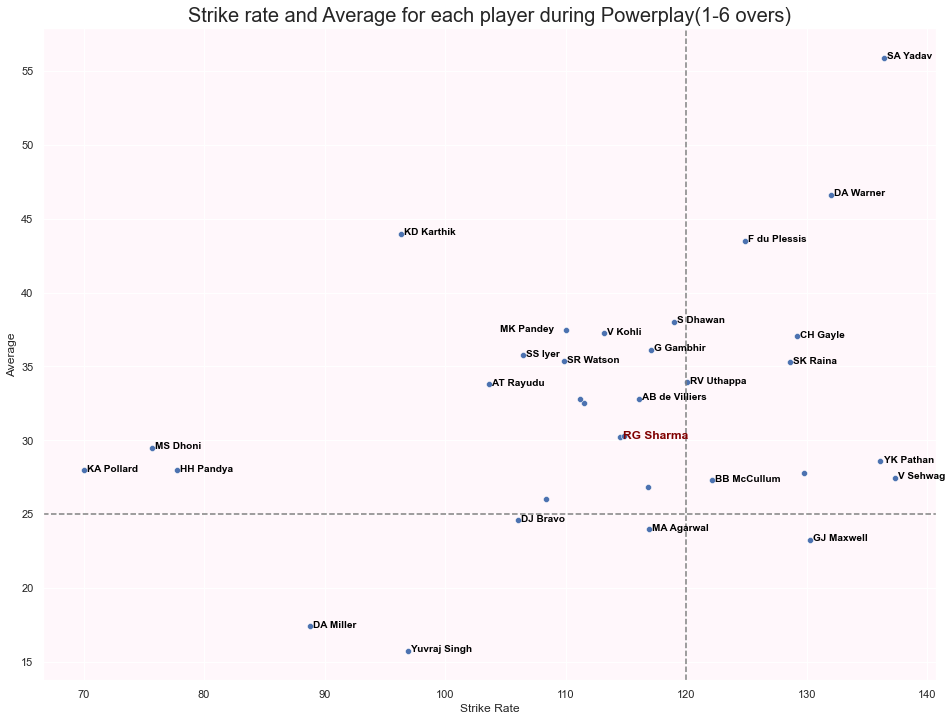

In [35]:
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = '#fff7fb'

required_df = total_scores_by_each_batsman[total_scores_by_each_batsman['number_of_innings'] >= 100][['striker', 'strike_rate_powerplay', 'average_powerplay']]
p1 = sns.scatterplot(x='strike_rate_powerplay', y='average_powerplay', data=required_df)

for line in range(required_df.shape[0]):
    if required_df.iloc[line, 0] == 'RG Sharma':
        p1.text(
            required_df.iloc[line, 1] + .25,
            required_df.iloc[line, 2] - 0.1, 
            required_df.iloc[line, 0],
            size='large',
            color='maroon',
            weight='bold'
        )
    elif required_df.iloc[line, 0] == 'MK Pandey':
        p1.text(
            required_df.iloc[line, 1] - 5.5,
            required_df.iloc[line, 2] - 0.1, 
            required_df.iloc[line, 0],
            size='medium',
            color='black',
            weight='semibold'
        )        
    elif required_df.iloc[line, 0] in [
        'SA Yadav', 'DA Warner', 'F du Plessis', 'CH Gayle', 'SK Raina', 'YK Pathan', 'V Sehwag', 'BB McCullum', 'RV Uthappa', 'S Dhawan',
        'KA Pollard', 'HH Pandya', 'MS Dhoni', 'KD Karthik', 'G Gambhir', 'SS Iyer', 'SR Watson', 'AB de Villiers', 'V Kohli',
        'DJ Bravo', 'MA Agarwal', 'GJ Maxwell', 'DA Miller', 'Yuvraj Singh', 'AT Rayudu'
    ]:
        p1.text(
            required_df.iloc[line, 1] + 0.25,
            required_df.iloc[line, 2] - 0.1, 
            required_df.iloc[line, 0],
            size='medium',
            color='black',
            weight='semibold'
        )

plt.axvline(120, ls='--', color='grey')
plt.axhline(25, ls='--', color='grey')        
plt.title('Strike rate and Average for each player during Powerplay(1-6 overs)', fontsize=20)
plt.xlabel('Strike Rate')
plt.ylabel('Average')
plt.show()    


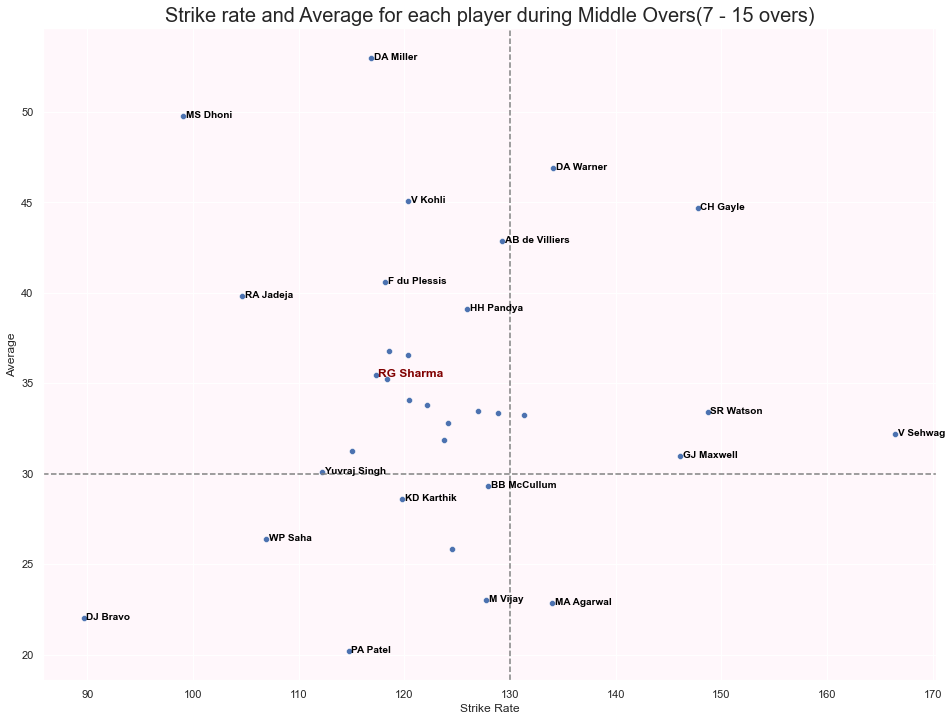

In [36]:
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = '#fff7fb'

required_df = total_scores_by_each_batsman[total_scores_by_each_batsman['number_of_innings'] >= 100][['striker', 'strike_rate_middle_overs', 'average_middle_overs']]
p1 = sns.scatterplot(x='strike_rate_middle_overs', y='average_middle_overs', data=required_df)

for line in range(required_df.shape[0]):
    if required_df.iloc[line, 0] == 'RG Sharma':
        p1.text(
            required_df.iloc[line, 1] + .25,
            required_df.iloc[line, 2] - 0.1, 
            required_df.iloc[line, 0],
            size='large',
            color='maroon',
            weight='bold'
        )
    elif required_df.iloc[line, 0] in [
        'DA Warner', 'F du Plessis', 'CH Gayle', 'V Sehwag', 'BB McCullum', 'V Kohli', 
        'HH Pandya', 'MS Dhoni', 'KD Karthik', 'SR Watson', 'AB de Villiers', 'RA Jadeja',
        'DJ Bravo', 'MA Agarwal', 'GJ Maxwell', 'DA Miller', 'Yuvraj Singh', 'WP Saha', 'PA Patel', 'M Vijay'
    ]:
        p1.text(
            required_df.iloc[line, 1] + 0.25,
            required_df.iloc[line, 2] - 0.1, 
            required_df.iloc[line, 0],
            size='medium',
            color='black',
            weight='semibold'
        )
plt.axvline(130, ls='--', color='grey')
plt.axhline(30, ls='--', color='grey')        
plt.title('Strike rate and Average for each player during Middle Overs(7 - 15 overs)', fontsize=20)
plt.xlabel('Strike Rate')
plt.ylabel('Average')
plt.show()

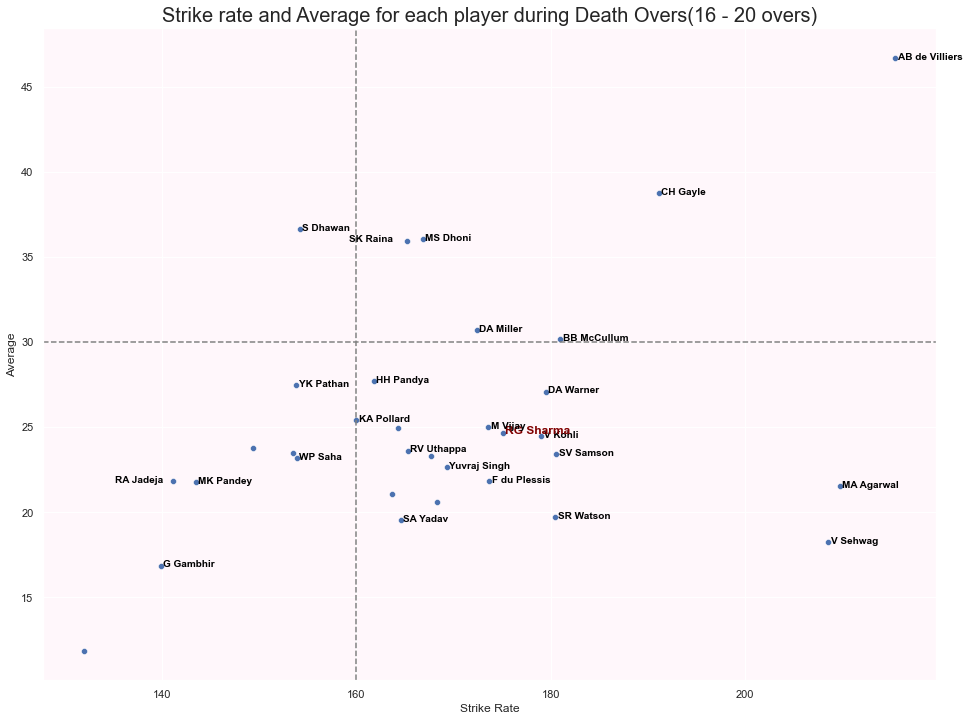

In [37]:
plt.figure(figsize=(16, 12))
plt.rcParams['axes.facecolor'] = '#fff7fb'

required_df = total_scores_by_each_batsman[total_scores_by_each_batsman['number_of_innings'] >= 100][['striker', 'strike_rate_death_overs', 'average_death_overs']]
p1 = sns.scatterplot(x='strike_rate_death_overs', y='average_death_overs', data=required_df)

for line in range(required_df.shape[0]):
    if required_df.iloc[line, 0] == 'RG Sharma':
        p1.text(
            required_df.iloc[line, 1] + .25,
            required_df.iloc[line, 2] - 0.1, 
            required_df.iloc[line, 0],
            size='large',
            color='maroon',
            weight='bold'
        )
    elif required_df.iloc[line, 0] in ['SK Raina', 'RA Jadeja']:
        p1.text(
            required_df.iloc[line, 1] - 6,
            required_df.iloc[line, 2] - 0.1, 
            required_df.iloc[line, 0],
            size='medium',
            color='black',
            weight='semibold'
        )        
    elif required_df.iloc[line, 0] in [
        'DA Warner', 'F du Plessis', 'CH Gayle', 'V Sehwag', 'BB McCullum', 'RV Uthappa', 
        'HH Pandya', 'MS Dhoni',  'SR Watson', 'AB de Villiers', 'S Dhawan', 'BB McCullum', 'SA Yadav',
        'MA Agarwal', 'DA Miller', 'Yuvraj Singh', 'V Kohli', 'M Vijay', 'SV Samson', 'YK Pathan', 'KA Pollard', 'WP Saha',
        'G Gambhir', 'MA Agarwal', 'MK Pandey'
    ]:
        p1.text(
            required_df.iloc[line, 1] + 0.25,
            required_df.iloc[line, 2] - 0.1, 
            required_df.iloc[line, 0],
            size='medium',
            color='black',
            weight='semibold'
        )
plt.axvline(160, ls='--', color='grey')
plt.axhline(30, ls='--', color='grey')        
plt.title('Strike rate and Average for each player during Death Overs(16 - 20 overs)', fontsize=20)
plt.xlabel('Strike Rate')
plt.ylabel('Average')
plt.show()


#  4. Rohit Against All Bowlers

In [38]:
all_bowlers_performance_against_Rohit =  Rohit_df[Rohit_df['player_dismissed'] == Rohit].groupby('bowler')[['match_id']].count().reset_index().sort_values(by='match_id', ascending=False)
all_bowlers_performance_against_Rohit = all_bowlers_performance_against_Rohit.rename(columns={'match_id': 'dismisal_counts'})

number_of_innings_played_against_all_bowlers = Rohit_df.groupby('bowler')[['match_id']].nunique().reset_index().sort_values(by='match_id', ascending=False)
number_of_innings_played_against_all_bowlers = number_of_innings_played_against_all_bowlers.rename(columns={'match_id': 'number_of_innings'})

balls_faced_per_bowler = Rohit_df.groupby('bowler')[['ball']].count().reset_index().sort_values(by='ball', ascending=False)
balls_faced_per_bowler = balls_faced_per_bowler.rename(columns={'ball': 'balls_faced'})

runs_scored_against_each_bowler = Rohit_df.groupby('bowler')[['runs_off_bat']].sum().reset_index().sort_values(by='runs_off_bat', ascending=False)
runs_scored_against_each_bowler = runs_scored_against_each_bowler.rename(columns={'runs_off_bat': 'runs_scored'})

boundries_scored_against_each_bowler = Rohit_df[Rohit_df['runs_off_bat'].isin([4, 6])].groupby('bowler')[['runs_off_bat']].count().reset_index().sort_values(by='runs_off_bat', ascending=False)
boundries_scored_against_each_bowler = boundries_scored_against_each_bowler.rename(columns={'runs_off_bat': 'boundries_scored'})

all_bowlers_performance_against_Rohit = all_bowlers_performance_against_Rohit.merge(number_of_innings_played_against_all_bowlers, on='bowler', how='left')
all_bowlers_performance_against_Rohit = all_bowlers_performance_against_Rohit.merge(balls_faced_per_bowler, on='bowler', how='left')
all_bowlers_performance_against_Rohit = all_bowlers_performance_against_Rohit.merge(runs_scored_against_each_bowler, on='bowler', how='left')
all_bowlers_performance_against_Rohit = all_bowlers_performance_against_Rohit.merge(boundries_scored_against_each_bowler, on='bowler', how='left')

all_bowlers_performance_against_Rohit['average'] = round(all_bowlers_performance_against_Rohit['runs_scored'] / all_bowlers_performance_against_Rohit['dismisal_counts'], 3)
all_bowlers_performance_against_Rohit['strike_rate'] = round(all_bowlers_performance_against_Rohit['runs_scored'] / all_bowlers_performance_against_Rohit['balls_faced'] * 100, 3)

display(all_bowlers_performance_against_Rohit.sort_values(by='dismisal_counts', ascending=False).head(10).style.background_gradient(cmap='viridis', low=.5, high=0).set_precision(2))

,bowler,dismisal_counts,number_of_innings,balls_faced,runs_scored,boundries_scored,average,strike_rate
0,A Mishra,7,17,91,87,5.00,12.43,95.60
1,SP Narine,7,18,128,137,17.00,19.57,107.03
2,R Vinay Kumar,6,6,34,22,3.00,3.67,64.71
3,UT Yadav,5,15,104,144,24.00,28.80,138.46
4,SK Trivedi,5,9,38,45,6.00,9.00,118.42
5,DJ Bravo,5,15,75,82,11.00,16.40,109.33
6,DS Kulkarni,4,9,42,65,11.00,16.25,154.76
7,Sandeep Sharma,4,11,42,37,5.00,9.25,88.09
14,RA Jadeja,3,16,74,71,3.00,23.67,95.95
19,Washington Sundar,3,6,26,25,3.00,8.33,96.15


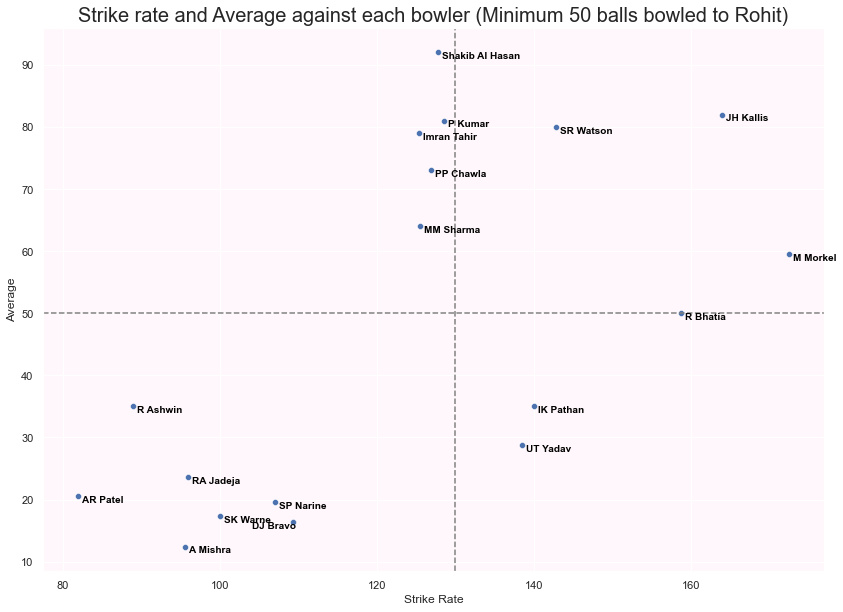

In [39]:
plt.figure(figsize=(14, 10))
plt.rcParams['axes.facecolor'] = '#fff7fb'

required_df = all_bowlers_performance_against_Rohit[all_bowlers_performance_against_Rohit['balls_faced'] >= 50]
p1 = sns.scatterplot(x='strike_rate', y='average', data=required_df)

for line in range(required_df.shape[0]):
    if required_df.iloc[line, 0] == 'DJ Bravo':
        p1.text(
            required_df.iloc[line, 7] - 5.25,
            required_df.iloc[line, 6] - 1, 
            required_df.iloc[line, 0],
            size='medium',
            color='black',
            weight='semibold'
        )
    else:
        p1.text(
            required_df.iloc[line, 7] + 0.5,
            required_df.iloc[line, 6] - 1, 
            required_df.iloc[line, 0],
            size='medium',
            color='black',
            weight='semibold'
        )
plt.axvline(130, ls='--', color='grey')
plt.axhline(50, ls='--', color='grey')        
plt.title('Strike rate and Average against each bowler (Minimum 50 balls bowled to Rohit)', fontsize=20)
plt.xlabel('Strike Rate')
plt.ylabel('Average')
plt.show()